# Task 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Data Cleaning

### Import

In [ ]:
x_train = pd.read_csv('../Data/X_train.csv')
x_train = x_train.drop('id', 1)
print(x_train.shape)

y_train = pd.read_csv('../Data/y_train.csv')
y_train = y_train.drop('id', 1)
print(y_train.shape)
# print(y_train.isnull().sum().sum()) - no missing values

x_test = pd.read_csv('../Data/X_test.csv')
x_test = x_test.drop('id', 1)
print(x_test.shape)
# print(x_test.isnull().sum().sum())

(1212, 832)
(1212, 1)
(776, 832)
40610


### Imputation 1

In [ ]:
# Fill values to help outlier detection
# Use median as it

# impute the nans:
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
x_train = pd.DataFrame(fill_NaN.fit_transform(x_train))
x_test = pd.DataFrame(fill_NaN.fit_transform(x_test))

# Sanity Check
print(x_train.isnull().sum().sum())

0


### Outlier Detection

In [ ]:
# Z-score

# Train 
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
z_scores = x_train.apply(lambda row: (row-mean).div(std), axis=1)
threashold = 3
# x_train_2 = x_train.where(z_scores<threashold, np.nan) --- Question: WHY DOESN'T THIS WORK?????
x_train = x_train.mask(z_scores>threashold)

# Test
mean = x_test.mean(axis=0)
std = x_test.std(axis=0)
z_scores = x_test.apply(lambda row: (row-mean).div(std), axis=1)
threashold = 3
# x_test_2 = x_test.where(z_scores<threashold, np.nan) --- Question: WHY DOESN'T THIS WORK?????
x_test = x_test.mask(z_scores>threashold)


# Sanity Checks:
# print(mean.head(), std)

# Sanity Check:
# print(z_scores.shape)
# print(z_scores.head())

# Sanity Check:
# Count outliers
# print((z_scores>threashold))

# print(x_train_2.head())
# print(x_train_2.shape)

# print(x_train_2.isnull().sum().sum())
# print((z_scores>threashold).sum().sum())
# print(x_train_3.isnull().sum().sum())

### Imputation 2

In [ ]:
# Fill values to help outlier detection
# Use median as it 

# impute the nans:
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
x_train = pd.DataFrame(fill_NaN.fit_transform(x_train))
x_test = pd.DataFrame(fill_NaN.fit_transform(x_test))

# Sanity Check
print(x_train.isnull().sum().sum())

0


### DataSet Split

In [ ]:
#. split own training data in train/test to evalueat, do k fold cv
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split( x_train, y_train, test_size=0.15, random_state=0)

## Model Training

### Lasso Regression

In [ ]:
# try different regressions:
lasso = Lasso(normalize=False, max_iter=1000, alpha=15000).fit(x_train_train, y_train_train)
y_pred = lasso.predict(x_train_test)

print('Train Score:')
print(lasso.score(x_train_train, y_train_train))

print('Test Score')
score = r2_score(y_train_test, y_pred)
print(score)



Train Score:
0.338279710399328
Test Score
0.32895419200454534
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35232.84337978566, tolerance: 10.00594456310679
  positive)


In [ ]:
scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='r2')
print(scores)

/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32799.382660449344, tolerance: 9.50152899896801
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32639.763574476383, tolerance: 9.45494113402062
  positive)
[0.35068476 0.2823353  0.28593109 0.27942763 0.28178787]
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31800.306238245597, tolerance: 9.21099886597938
  positive)


(array([ 2.,  1.,  0.,  5.,  3., 12., 15., 40., 24., 32., 19., 16., 10.,
         2.,  1.]),
 array([51.33775398, 53.51370154, 55.6896491 , 57.86559666, 60.04154422,
        62.21749178, 64.39343934, 66.5693869 , 68.74533447, 70.92128203,
        73.09722959, 75.27317715, 77.44912471, 79.62507227, 81.80101983,
        83.97696739]),
 <BarContainer object of 15 artists>)

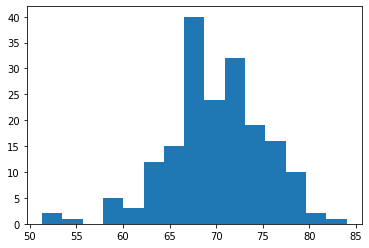

In [ ]:
plt.hist(y_pred, bins='auto')